In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
#import Dataset

In [2]:
dataset = pd.read_csv('kidney_disease.csv')

In [3]:
dataset.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [4]:
dataset[['htn','dm','cad','pe','ane']]=dataset[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
dataset[['rbc','pc']] = dataset[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
dataset[['pcc','ba']] = dataset[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
dataset[['appet']] = dataset[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
dataset['classification']=dataset['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
dataset.rename(columns={'classification':'class'},inplace=True)

In [5]:
dataset['pe'] = dataset['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
dataset['appet'] = dataset['appet'].replace(to_replace='no',value=0)
dataset['cad'] = dataset['cad'].replace(to_replace='\tno',value=0)
dataset['dm'] = dataset['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
dataset.drop('id',axis=1,inplace=True)

In [6]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [7]:
for i in ['rc','wc','pcv']:
    dataset[i] = dataset[i].str.extract('(\d+)').astype(float)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wc      294 non-null    float64
 17  rc      269 non-null    float64
 18  htn     398 non-null    float64
 19  dm      398 non-null    float64
 20  cad     398 non-null    float64
 21  appet   399 non-null    float64
 22  pe

In [9]:
from sklearn.impute import KNNImputer

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns = dataset.columns)
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,0.522727,0.230769,0.75,0.2,0.0,NaN,0.0,0.0,0.0,0.211538,...,0.777778,0.231405,0.500000,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.056818,0.000000,0.75,0.8,0.0,NaN,0.0,0.0,0.0,NaN,...,0.644444,0.157025,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.681818,0.230769,0.25,0.4,0.6,0.0,0.0,0.0,0.0,0.856838,...,0.488889,0.219008,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.522727,0.153846,0.00,0.8,0.0,0.0,1.0,1.0,0.0,0.202991,...,0.511111,0.185950,0.166667,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.556818,0.230769,0.25,0.4,0.0,0.0,0.0,0.0,0.0,0.179487,...,0.577778,0.210744,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [11]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dataset = pd.DataFrame(imputer.fit_transform(dataset),columns = dataset.columns)

In [12]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,0.522727,0.230769,0.75,0.2,0.0,0.2,0.0,0.0,0.0,0.211538,...,0.777778,0.231405,0.500000,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.056818,0.000000,0.75,0.8,0.0,0.4,0.0,0.0,0.0,0.125641,...,0.644444,0.157025,0.366667,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.681818,0.230769,0.25,0.4,0.6,0.0,0.0,0.0,0.0,0.856838,...,0.488889,0.219008,0.166667,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.522727,0.153846,0.00,0.8,0.0,0.0,1.0,1.0,0.0,0.202991,...,0.511111,0.185950,0.166667,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.556818,0.230769,0.25,0.4,0.0,0.0,0.0,0.0,0.0,0.179487,...,0.577778,0.210744,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [13]:
dataset.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wc       0
rc       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

<AxesSubplot:>

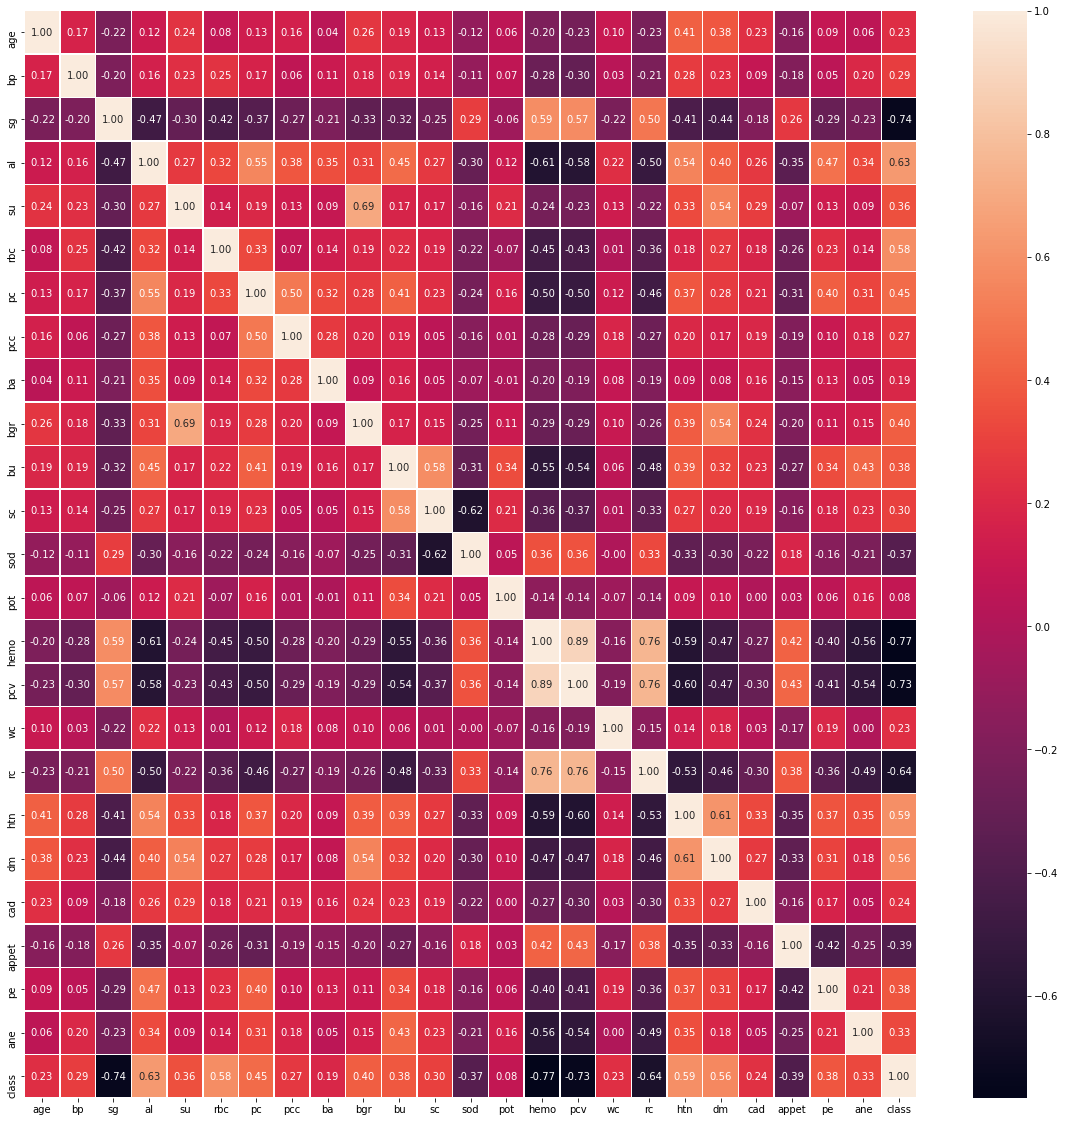

In [14]:
import seaborn as sns
plt.figure(figsize = (20,20))
sns.heatmap(dataset.corr(), annot = True, fmt=".2f",linewidths=0.5)

In [15]:
dataset.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
age,1.000000,0.167130,-0.215501,0.123034,0.241695,0.075492,0.131360,0.157092,0.042666,0.257036,...,-0.234663,0.104827,-0.227060,0.407446,0.377442,0.230533,-0.160044,0.089366,0.061203,0.227483
bp,0.167130,1.000000,-0.202987,0.156276,0.229219,0.246228,0.171856,0.062198,0.113733,0.178108,...,-0.304952,0.034513,-0.211003,0.276906,0.231265,0.088823,-0.182751,0.053285,0.195122,0.287009
sg,-0.215501,-0.202987,1.000000,-0.467829,-0.304669,-0.420878,-0.368087,-0.270955,-0.206593,-0.327601,...,0.574128,-0.220419,0.496248,-0.407744,-0.440399,-0.182355,0.262801,-0.290112,-0.234323,-0.736477
al,0.123034,0.156276,-0.467829,1.000000,0.273285,0.320019,0.553692,0.377665,0.349971,0.310716,...,-0.584084,0.222722,-0.504873,0.539111,0.404921,0.264678,-0.351271,0.472538,0.337743,0.628699
su,0.241695,0.229219,-0.304669,0.273285,1.000000,0.138116,0.194927,0.130776,0.093085,0.694854,...,-0.234880,0.126743,-0.220755,0.332637,0.536286,0.285623,-0.067993,0.128071,0.094514,0.358066
rbc,0.075492,0.246228,-0.420878,0.320019,0.138116,1.000000,0.329128,0.070327,0.135194,0.187169,...,-0.432761,0.013684,-0.362735,0.184373,0.265617,0.176794,-0.263231,0.227498,0.143962,0.581659
pc,0.131360,0.171856,-0.368087,0.553692,0.194927,0.329128,1.000000,0.500429,0.324487,0.277498,...,-0.500157,0.124039,-0.463967,0.372614,0.277394,0.207382,-0.308887,0.401862,0.313578,0.449719
pcc,0.157092,0.062198,-0.270955,0.377665,0.130776,0.070327,0.500429,1.000000,0.275082,0.198022,...,-0.291161,0.179818,-0.273200,0.195623,0.165236,0.188029,-0.189688,0.104356,0.175861,0.265313
ba,0.042666,0.113733,-0.206593,0.349971,0.093085,0.135194,0.324487,0.275082,1.000000,0.085324,...,-0.193235,0.084323,-0.189403,0.089046,0.080070,0.162395,-0.149126,0.134732,0.052208,0.186871
bgr,0.257036,0.178108,-0.327601,0.310716,0.694854,0.187169,0.277498,0.198022,0.085324,1.000000,...,-0.285348,0.101710,-0.260775,0.394856,0.539109,0.240036,-0.195085,0.112359,0.148661,0.402778


In [16]:
X = dataset.drop(['class','sg', 'appet', 'rc', 'pcv', 'hemo', 'sod'], axis = 1)
y=dataset['class']

In [17]:
X.columns

Index(['age', 'bp', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'pot', 'wc', 'htn', 'dm', 'cad', 'pe', 'ane'],
      dtype='object')

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
model = RandomForestClassifier(n_estimators = 20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [23]:
confusion_matrix(y_test, model.predict(X_test))

array([[44,  0],
       [ 0, 76]], dtype=int64)

In [24]:
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test))*100, 2)}%")

Accuracy is 100.0%


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     400 non-null    float64
 6   pc      400 non-null    float64
 7   pcc     400 non-null    float64
 8   ba      400 non-null    float64
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wc      400 non-null    float64
 17  rc      400 non-null    float64
 18  htn     400 non-null    float64
 19  dm      400 non-null    float64
 20  cad     400 non-null    float64
 21  appet   400 non-null    float64
 22  pe

In [27]:
dataset.shape

(400, 25)

In [28]:
import pickle
pickle.dump(model, open('kidney.pkl', 'wb'))